In [1]:
import pandas as pd

In [6]:
basal.query('term_name==nuclear division')

SyntaxError: invalid syntax (<unknown>, line 1)

In [2]:
#import original gProfiler outputs
LumA = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\gprofiler\gprofiler_2\gProfiler_LumA.csv')
LumB = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\gprofiler\gprofiler_2\gProfiler_LumB.csv')
her2 = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\gprofiler\gprofiler_2\gProfiler_her2.csv')
basal = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\gprofiler\gprofiler_2\gProfiler_basal.csv')
normal = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\gprofiler\gprofiler_2\gProfiler_normal.csv')

In [3]:
#filter for p<=0.01, GOBP only, 15<=term_size<=500
def filtered_pathways(gprofiler):
    gprofiler.query('adjusted_p_value <= 0.01 and source == "GO:BP" and 15<=term_size<=500',inplace=True)              
    return gprofiler

In [4]:
#store filtered dataframe in csv
types = (LumA, LumB, her2, basal, normal)
names = ('LumA', 'LumB', 'her2', 'basal', 'normal')
for type, name in zip(types, names):
    filtered_pathways(type).to_csv(rf'C:\Users\javte\Documents\SSEF project\datasets\gprofiler\gprofiler_2\filtered\{name}.csv')

In [5]:
#import filtered dataframes
LumA = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\gprofiler\gprofiler_2\filtered\LumA.csv',index_col=[0])
LumB = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\gprofiler\gprofiler_2\filtered\LumB.csv',index_col=[0])
her2 = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\gprofiler\gprofiler_2\filtered\her2.csv',index_col=[0])
basal = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\gprofiler\gprofiler_2\filtered\basal.csv',index_col=[0])
normal = pd.read_csv(r'C:\Users\javte\Documents\SSEF project\datasets\gprofiler\gprofiler_2\filtered\normal.csv',index_col=[0])

C:\Users\javte\AppData\Local\Temp\ipykernel_5704\2098223726.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot.rename(columns={"negative_log10_of_adjusted_p_value":"-lg p"},inplace=True)
C:\Users\javte\AppData\Local\Temp\ipykernel_5704\2098223726.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot.rename(columns={"negative_log10_of_adjusted_p_value":"-lg p"},inplace=True)
C:\Users\javte\AppData\Local\Temp\ipykernel_5704\2098223726.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

TypeError: no numeric data to plot

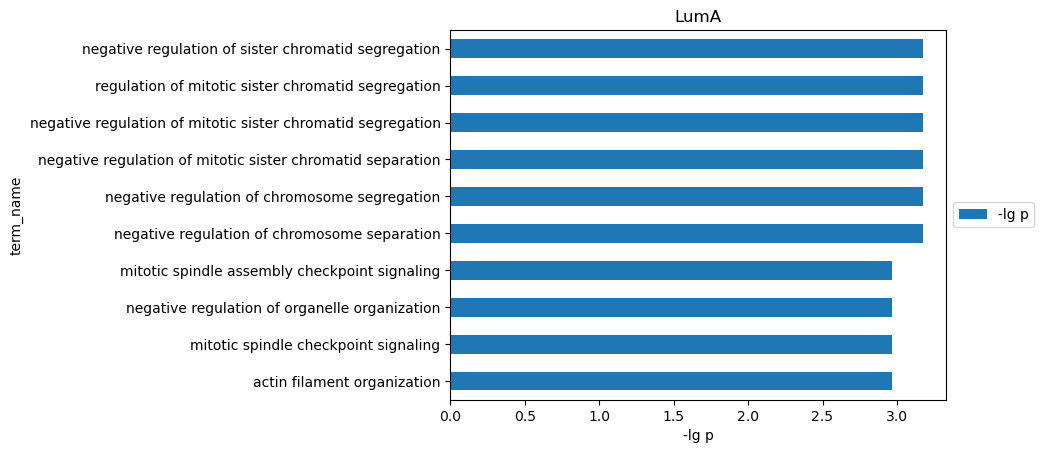

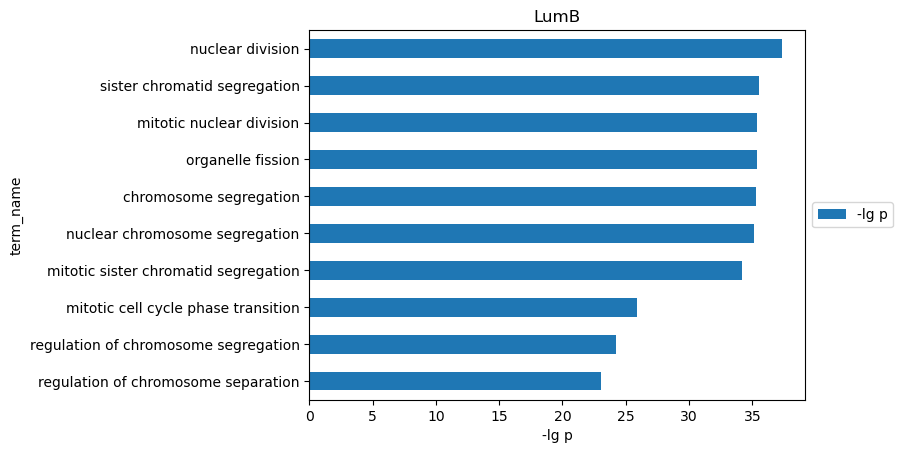

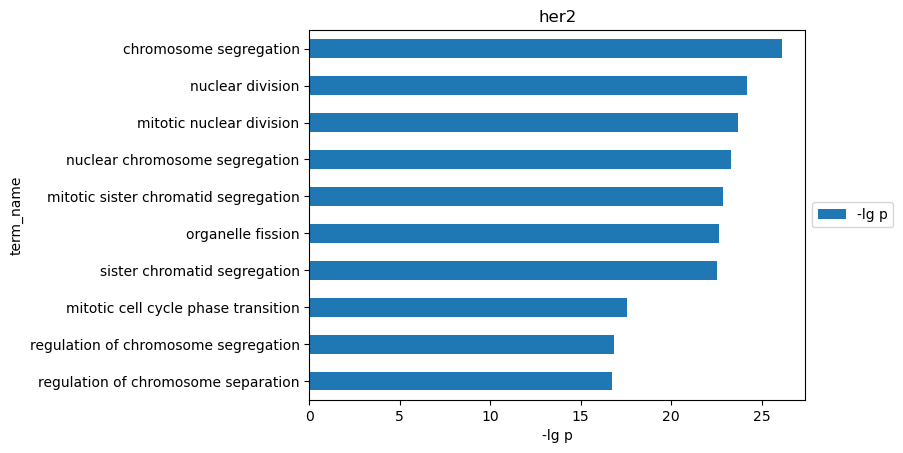

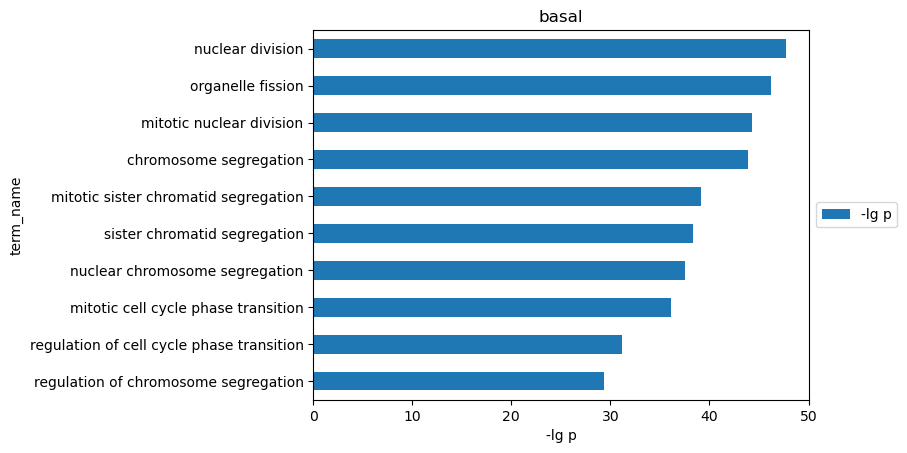

In [6]:
import matplotlib.pyplot as plt
#first 10 rows of dataframe (sorted by -lg p)
LumA_plot = LumA.iloc[:10,:]
LumB_plot = LumB.iloc[:10,:]
her2_plot = her2.iloc[:10,:]
basal_plot = basal.iloc[:10,:]
normal_plot = normal.iloc[:10,:]

plots = (LumA_plot, LumB_plot, her2_plot, basal_plot, normal_plot)
#plot -lg p against term_name for all subtypes
for plot,name in zip(plots,names):
    plot.rename(columns={"negative_log10_of_adjusted_p_value":"-lg p"},inplace=True) 
    plot.plot.barh(x="term_name",
                   y="-lg p",
                   title=name
                   ).legend(
        loc='center left',bbox_to_anchor=(1.0, 0.5)
    ); 
    plt.gca().invert_yaxis()
    plt.gca().set_xlabel("-lg p")

In [7]:
#only pathway names 
LumA_pathways = pd.DataFrame(LumA.term_name)
LumB_pathways = pd.DataFrame(LumB.term_name)
her2_pathways = pd.DataFrame(her2.term_name)
basal_pathways = pd.DataFrame(basal.term_name)
normal_pathways = pd.DataFrame(normal.term_name)


<AxesSubplot:>

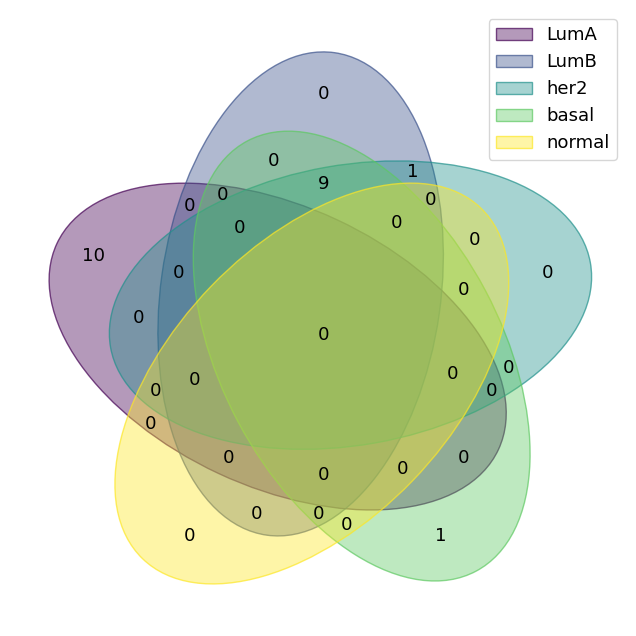

In [8]:
#venn diagran (top 10)
from venn import venn
d1 = LumA_pathways.term_name.iloc[:10]
d2 = LumB_pathways.term_name.iloc[:10]
d3 = her2_pathways.term_name.iloc[:10]
d4 = basal_pathways.term_name.iloc[:10]
d5 = normal_pathways.term_name.iloc[:10]

datas = {
    "LumA": set(d1),
    "LumB": set(d2),
    "her2": set(d3),
    "basal": set(d4),
    "normal": set(d5)
}
venn(datas)

In [9]:
#only interested in pathway name and -lg p
LumA_table = LumA.loc[:,['term_name','negative_log10_of_adjusted_p_value']]
LumA_table.index=LumA_table.term_name
del LumA_table['term_name']

LumB_table = LumB.loc[:,['term_name','negative_log10_of_adjusted_p_value']]
LumB_table.index=LumB_table.term_name
del LumB_table['term_name']

her2_table = her2.loc[:,['term_name','negative_log10_of_adjusted_p_value']]
her2_table.index=her2_table.term_name
del her2_table['term_name']

basal_table = basal.loc[:,['term_name','negative_log10_of_adjusted_p_value']]
basal_table.index=basal_table.term_name
del basal_table['term_name']

normal_table = normal.loc[:,['term_name','negative_log10_of_adjusted_p_value']]
normal_table.index=normal_table.term_name
del normal_table['term_name']


In [37]:
#combine the data sets(first n)
n = 30
unique_BP_set = set(LumA_pathways.term_name.head(n)).union(set(LumB_pathways.term_name.head(n)),set(her2_pathways.term_name.head(n)),set(basal_pathways.term_name.head(n)),set(normal_pathways.term_name.head(n)))
unique_BP = pd.DataFrame(index=list(unique_BP_set))
unique_BP = unique_BP.join(LumA_table.head(n))
unique_BP = unique_BP.join(LumB_table.head(n),lsuffix='_LumA',rsuffix='_LumB')
unique_BP = unique_BP.join(her2_table.head(n))
unique_BP = unique_BP.join(basal_table.head(n),lsuffix='_her2',rsuffix='_basal')
unique_BP = unique_BP.join(normal_table.head(n))
unique_BP.rename(columns={"negative_log10_of_adjusted_p_value":"negative_log10_of_adjusted_p_value_normal"},inplace=True) 

In [38]:
#sorting dataframe by aggressiveness (top 10)
unique_BP.rename(columns={"negative_log10_of_adjusted_p_value_LumA":"-lg p_LumA",
                         "negative_log10_of_adjusted_p_value_LumB":"-lg p_LumB",
                         "negative_log10_of_adjusted_p_value_her2":"-lg p_her2",
                         "negative_log10_of_adjusted_p_value_basal":"-lg p_basal",
                         "negative_log10_of_adjusted_p_value_normal":"-lg p_normalL"}, inplace=True)
sorters_r = list(["-lg p_LumA", "-lg p_LumB", "-lg p_her2", "-lg p_basal", "-lg p_normalL"])

sorters = reversed(sorters_r)
               
for sorter in sorters:
    unique_BP.sort_values(by=sorter, ascending=False, inplace=True)

In [39]:
del unique_BP['-lg p_normalL']

Text(0.5, 1.0, 'Mapping GO terms for across molecular subtypes by top 30 hits')

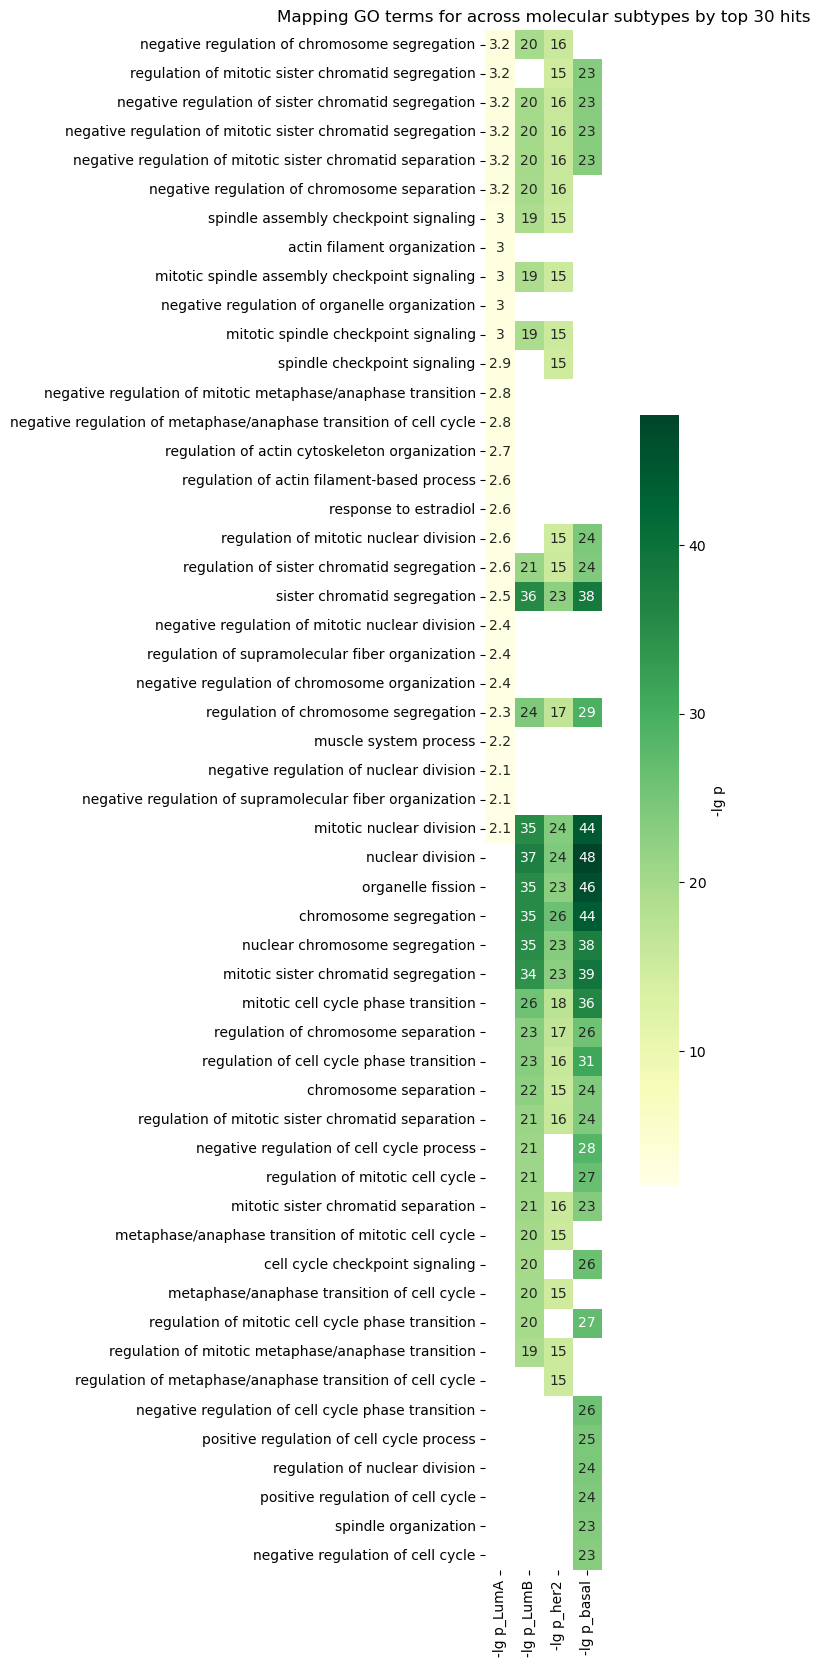

In [40]:
#heatmap plot (top 10)
import seaborn as sns
%matplotlib inline
plt.subplots(figsize=(10,20))
sns.heatmap(unique_BP, square=True, annot = True,annot_kws={'size': 10}, cbar_kws={'shrink': 0.5, 'label': "-lg p"},cmap='YlGn')
plt.title(f"Mapping GO terms for across molecular subtypes by top {n} hits")                                                          


<AxesSubplot:>

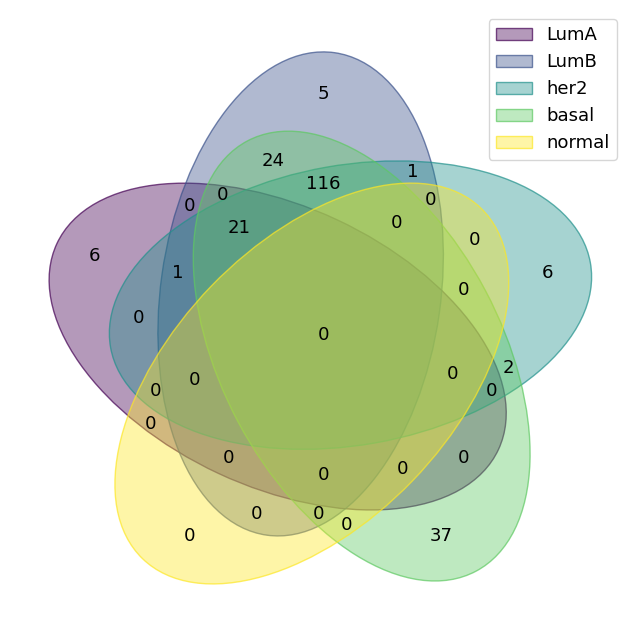

In [14]:
#venn diagram(all)
from venn import venn
d1_all = LumA_pathways.term_name
d2_all = LumB_pathways.term_name
d3_all = her2_pathways.term_name
d4_all = basal_pathways.term_name
d5_all = normal_pathways.term_name

datas_all = {
    "LumA": set(d1_all),
    "LumB": set(d2_all),
    "her2": set(d3_all),
    "basal": set(d4_all),
    "normal": set(d5_all)
}
venn(datas_all)

In [15]:
#combining data sets(all)
unique_BP_set = set(LumA_pathways.term_name).union(set(LumB_pathways.term_name),
                                                   set(her2_pathways.term_name),
                                                   set(basal_pathways.term_name),
                                                   set(normal_pathways.term_name))
unique_BP_all = pd.DataFrame(index=list(unique_BP_set))
unique_BP_all = unique_BP_all.join(LumA_table)
unique_BP_all = unique_BP_all.join(LumB_table,lsuffix='_LumA',rsuffix='_LumB')
unique_BP_all = unique_BP_all.join(her2_table)
unique_BP_all = unique_BP_all.join(basal_table,lsuffix='_her2',rsuffix='_basal')
unique_BP_all = unique_BP_all.join(normal_table)
unique_BP_all.rename(columns={"negative_log10_of_adjusted_p_value":"negative_log10_of_adjusted_p_value_normal"},inplace=True) 

In [19]:
#sorting dataframe by aggressiveness (all)
unique_BP_all.rename(columns={"negative_log10_of_adjusted_p_value_LumA":"-lg p_LumA",
                         "negative_log10_of_adjusted_p_value_LumB":"-lg p_LumB",
                         "negative_log10_of_adjusted_p_value_her2":"-lg p_her2",
                         "negative_log10_of_adjusted_p_value_basal":"-lg p_basal",
                         "negative_log10_of_adjusted_p_value_normal":"-lg p_normalL"}, inplace=True)
sorters_r = list(["-lg p_LumA", "-lg p_LumB", "-lg p_her2", "-lg p_basal", "-lg p_normalL"])

sorters = reversed(sorters_r)
               
for sorter in sorters:
    unique_BP_all.sort_values(by=sorter, ascending=False, inplace=True)
del unique_BP_all['-lg p_normalL']

KeyError: '-lg p_normalL'

Text(0.5, 1.0, 'Mapping GO terms for across molecular subtypes by all hits')

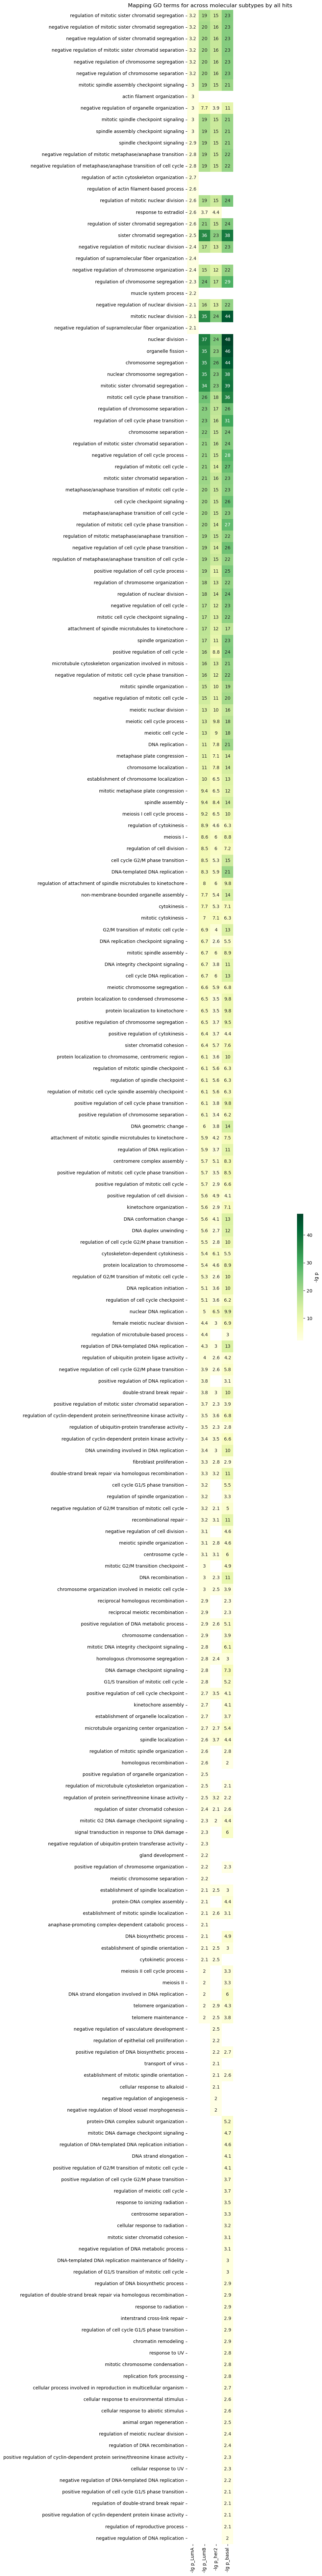

In [20]:
#heatmap plot (all)
%matplotlib inline
plt.subplots(figsize=(50,100))
sns.heatmap(unique_BP_all, square=True, annot = True,annot_kws={'size': 10}, cbar_kws={'shrink': 0.05, 'label': "-lg p"},cmap='YlGn')
plt.title("Mapping GO terms for across molecular subtypes by all hits")                                                                


In [18]:
#pathways = (LumA_pathways, LumB_pathways, her2_pathways, basal_pathways, normal_pathways)
#names = ('LumA_pathways', 'LumB_pathways', 'her2_pathways', 'basal_pathways', 'normal_pathways')
#for pathway,name in zip(pathways,names):
 #   pathway.to_csv(rf'C:\Users\javte\Documents\SSEF project\datasets\gprofiler\cleaned_gProfiler\pathways\{name}')